#Supermarket Customer Analysis

**Problem Statement:** Identify customer characteristics that are most likely to respond to promotional campaigns in the future.

## 1. Background

In today's competitive retail environment, leveraging customer data is key to improving marketing strategy effectiveness. Modern supermarkets rely not only on physical locations but also on digital channels such as websites and catalogs to reach consumers. Therefore, it is important for companies to understand customer characteristics and behaviors, especially in responding to promotional campaigns.

This dataset provides comprehensive information about customer demographics, shopping habits, purchase channels, and responses to various promotional campaigns conducted over the past two years. By analyzing this data, the company can develop more targeted promotional strategies and improve campaign conversion rates in the future.

### Problem Statement

1. What are the demographic and behavioral characteristics of customers who respond to marketing campaigns?
2. Which features or variables have the most influence on campaign success?
3. How can the supermarket improve campaign effectiveness based on customer data?

### Objective

1. Describe customer characteristics based on campaign response.
2. Identify features that are most correlated with campaign success.
3. Provide actionable recommendations for the supermarket to improve campaign effectiveness.

## 2. Data Overview

In [47]:
# Imports and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, skew, ttest_ind

# Set visualization style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 10

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")


Libraries imported successfully!


In [48]:
# DATA LOADING
df = pd.read_csv('SupermarketCustomers.csv', sep='\t')

# Ukuran dataset
print("📊 Dataset Overview")
print("=" * 60)
print(f"Jumlah baris dan kolom: {df.shape}")
print(f"\nTipe Data Tiap Kolom:")
print(df.dtypes)
print(f"\nMissing Values:")
missing = df.isnull().sum()[df.isnull().sum() > 0]
if len(missing) > 0:
    print(missing)
else:
    print("Tidak ada missing values")
print("=" * 60)


📊 Dataset Overview
Jumlah baris dan kolom: (2240, 29)

Tipe Data Tiap Kolom:
ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

Missing V

In [49]:
# Descriptive statistics for numeric variables
print("\nDescriptive Statistics (Numeric):")
print("-" * 60)
df.describe()



Descriptive Statistics (Numeric):
------------------------------------------------------------


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [50]:
# Statistik deskriptif untuk numerik
print("\nStatistik Deskriptif:")
df.describe()



Statistik Deskriptif:


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


### Eksplorasi Awal Dataset

Berdasarkan hasil eksplorasi awal terhadap dataset, diperoleh informasi sebagai berikut:

- Dataset terdiri dari **2.240 baris** dan **29 kolom**, yang mencerminkan data pelanggan supermarket beserta perilaku belanja dan respons mereka terhadap campaign promosi.
- Tipe data tiap kolom telah sesuai dengan konteksnya, di mana kolom numerik seperti `Income`, `Recency`, dan `MntWines` bertipe numerik, sedangkan kolom kategorikal seperti `Education` dan `Marital_Status` bertipe object.
- Terdapat **24 nilai kosong pada kolom `Income`**, yang akan ditangani pada tahap data cleaning.
- Statistik deskriptif menunjukkan adanya variasi besar dalam pengeluaran pelanggan terhadap produk tertentu. Misalnya, pelanggan menghabiskan rata-rata sekitar **$304** untuk pembelian wine dalam dua tahun terakhir, dengan pengeluaran maksimal mencapai **$1.493**. Hal ini mengindikasikan adanya perbedaan preferensi belanja yang cukup signifikan antar pelanggan.

## 3. Data Cleaning

In [51]:
# Calculate number and percentage of missing values
missing_count = df['Income'].isna().sum()
missing_pct = missing_count / df.shape[0] * 100
print(f"Missing values in Income column: {missing_count} rows ({missing_pct:.2f}%)")

# Remove rows with missing Income values
df_clean = df.dropna(subset=['Income']).copy()
print(f"Number of rows after removal: {df_clean.shape[0]} (from {df.shape[0]})")

# Reset index
df_clean.reset_index(drop=True, inplace=True)
print("Missing values handled")

Missing values in Income column: 24 rows (1.07%)
Number of rows after removal: 2216 (from 2240)
Missing values handled


In [52]:
# Check for duplicates
duplicate_count = df_clean.duplicated().sum()
print(f"Number of duplicates: {duplicate_count}")
if duplicate_count == 0:
    print("No duplicates found")

Number of duplicates: 0
No duplicates found


In [53]:
# Convert date column to datetime
df_clean['Dt_Customer'] = pd.to_datetime(df_clean['Dt_Customer'], format="%d-%m-%Y")
print("Dt_Customer column converted to datetime")

Dt_Customer column converted to datetime


In [54]:
# Export cleaned data (optional)
df_clean.to_csv("cleaned_supermarket_data.csv", index=False, encoding='utf-8')
print("Cleaned data saved to cleaned_supermarket_data.csv")

Cleaned data saved to cleaned_supermarket_data.csv


In [55]:
# Ubah kolom tanggal menjadi datetime
df_clean = df.dropna(subset=['Income']).copy()
df_clean['Dt_Customer'] = pd.to_datetime(df_clean['Dt_Customer'], format="%d-%m-%Y")

In [56]:
# Ekspor DataFrame df_clean ke file CSV
df_clean.to_csv("cleaned_supermarket_data.csv", index=False, encoding='utf-8')

In [57]:
# Identifikasi outlier pada Income menggunakan IQR method
Q1 = df_clean['Income'].quantile(0.25)
Q3 = df_clean['Income'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Income Statistics:")
print(f"Q1: ${Q1:,.2f}")
print(f"Q3: ${Q3:,.2f}")
print(f"IQR: ${IQR:,.2f}")
print(f"Lower bound: ${lower_bound:,.2f}")
print(f"Upper bound: ${upper_bound:,.2f}")

# Identifikasi outlier
outliers = df_clean[(df_clean['Income'] < lower_bound) | (df_clean['Income'] > upper_bound)]
print(f"\nJumlah outlier (IQR method): {len(outliers)}")

# Cek nilai ekstrem
extreme_outliers = df_clean[df_clean['Income'] > 200000]
print(f"\nPelanggan dengan Income > $200,000:")
print(extreme_outliers[['ID', 'Income', 'TotalSpending' if 'TotalSpending' in df_clean.columns else 'MntWines']].head(10))


Income Statistics:
Q1: $35,303.00
Q3: $68,522.00
IQR: $33,219.00
Lower bound: $-14,525.50
Upper bound: $118,350.50

Jumlah outlier (IQR method): 8

Pelanggan dengan Income > $200,000:
        ID    Income  MntWines
2233  9432  666666.0         9


In [58]:
# Handle outlier Income dengan capping method (winsorization)
# Nilai di atas upper_bound akan di-cap ke nilai Q3 + 1.5*IQR
# Nilai 666,666 kemungkinan besar adalah data entry error

# Simpan data sebelum handling untuk perbandingan
df_before_outlier = df_clean.copy()

# Cap outlier ke 95th percentile (lebih konservatif dari IQR)
income_95th = df_clean['Income'].quantile(0.95)
print(f"Income 95th percentile: ${income_95th:,.2f}")

# Cap nilai yang lebih tinggi dari 95th percentile
df_clean['Income_Original'] = df_clean['Income'].copy()  # Simpan original
df_clean.loc[df_clean['Income'] > income_95th, 'Income'] = income_95th

# Tampilkan perubahan
capped_count = (df_clean['Income_Original'] > income_95th).sum()
print(f"Jumlah nilai yang di-cap: {capped_count}")
print(f"\nIncome setelah capping:")
print(df_clean['Income'].describe())


Income 95th percentile: $84,130.00
Jumlah nilai yang di-cap: 111

Income setelah capping:
count     2216.000000
mean     51482.556859
std      20274.980199
min       1730.000000
25%      35303.000000
50%      51381.500000
75%      68522.000000
max      84130.000000
Name: Income, dtype: float64


In [59]:
# 1. Total Spending - Jumlah total pengeluaran di semua kategori produk
spending_cols = [col for col in df_clean.columns if col.startswith('Mnt')]
df_clean['TotalSpending'] = df_clean[spending_cols].sum(axis=1)

print("1. Total Spending created")
print(f"   Mean: ${df_clean['TotalSpending'].mean():,.2f}")
print(f"   Median: ${df_clean['TotalSpending'].median():,.2f}")
print(f"   Max: ${df_clean['TotalSpending'].max():,.2f}")


1. Total Spending created
   Mean: $607.08
   Median: $396.50
   Max: $2,525.00


In [60]:
# 2. Total Purchases - Total jumlah transaksi di semua channel
purchase_cols = [col for col in df_clean.columns if col.startswith('Num') and 'Purchase' in col]
df_clean['TotalPurchases'] = df_clean[purchase_cols].sum(axis=1)

print("2. Total Purchases created")
print(f"   Mean: {df_clean['TotalPurchases'].mean():.2f}")
print(f"   Median: {df_clean['TotalPurchases'].median():.2f}")


2. Total Purchases created
   Mean: 14.88
   Median: 15.00


In [61]:
# 3. Average Transaction Value
df_clean['AvgTransactionValue'] = df_clean['TotalSpending'] / df_clean['TotalPurchases'].replace(0, np.nan)

print("3. Average Transaction Value created")
print(f"   Mean: ${df_clean['AvgTransactionValue'].mean():,.2f}")
print(f"   Median: ${df_clean['AvgTransactionValue'].median():,.2f}")


3. Average Transaction Value created
   Mean: $32.68
   Median: $23.43


In [62]:
# 4. Customer Tenure - Lama menjadi pelanggan
# Asumsikan analisis dilakukan pada tanggal tertentu (misalnya akhir 2014)
# Atau gunakan tanggal terbaru di dataset sebagai referensi
reference_date = df_clean['Dt_Customer'].max()
df_clean['Tenure_Days'] = (reference_date - df_clean['Dt_Customer']).dt.days
df_clean['Tenure_Months'] = df_clean['Tenure_Days'] / 30.44  # Rata-rata hari per bulan
df_clean['Tenure_Years'] = df_clean['Tenure_Days'] / 365.25

print("4. Customer Tenure created")
print(f"   Mean tenure: {df_clean['Tenure_Months'].mean():.1f} months")
print(f"   Max tenure: {df_clean['Tenure_Months'].max():.1f} months")


4. Customer Tenure created
   Mean tenure: 11.6 months
   Max tenure: 23.0 months


In [63]:
# 5. Customer Lifetime Value (CLV) - Annualized
# CLV = Total Spending / (Tenure in Years)
df_clean['CLV'] = df_clean['TotalSpending'] / df_clean['Tenure_Years'].replace(0, np.nan)

print("5. Customer Lifetime Value (CLV) created")
print(f"   Mean CLV: ${df_clean['CLV'].mean():,.2f}/year")
print(f"   Median CLV: ${df_clean['CLV'].median():,.2f}/year")


5. Customer Lifetime Value (CLV) created
   Mean CLV: $2,127.40/year
   Median CLV: $453.54/year


In [64]:
# 6. Channel Preference - Channel pembelian yang paling dominan
purchase_channels = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
df_clean['DominantChannel'] = df_clean[purchase_channels].idxmax(axis=1)
df_clean['DominantChannel'] = df_clean['DominantChannel'].str.replace('Num', '').str.replace('Purchases', '')

print("6. Channel Preference created")
print(df_clean['DominantChannel'].value_counts())


6. Channel Preference created
DominantChannel
Store      1460
Web         597
Catalog     159
Name: count, dtype: int64


In [65]:
# 7. Product Category Preference - Kategori produk favorit
product_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
                'MntSweetProducts', 'MntGoldProds']
df_clean['FavoriteCategory'] = df_clean[product_cols].idxmax(axis=1)
df_clean['FavoriteCategory'] = df_clean['FavoriteCategory'].str.replace('Mnt', '')

print("7. Product Category Preference created")
print(df_clean['FavoriteCategory'].value_counts())


7. Product Category Preference created
FavoriteCategory
Wines            1522
MeatProducts      437
GoldProds         167
FishProducts       59
SweetProducts      16
Fruits             15
Name: count, dtype: int64


In [66]:
# 8. RFM Segments - Recency, Frequency, Monetary
# Recency: 0-30 (High), 31-60 (Medium), 61-99 (Low)
df_clean['R_Segment'] = pd.cut(df_clean['Recency'], 
                                bins=[-1, 30, 60, 100], 
                                labels=['High', 'Medium', 'Low'])

# Frequency: Berdasarkan TotalPurchases (tertile)
df_clean['F_Segment'] = pd.qcut(df_clean['TotalPurchases'], 
                                 q=3, 
                                 labels=['Low', 'Medium', 'High'],
                                 duplicates='drop')

# Monetary: Berdasarkan TotalSpending (tertile)
df_clean['M_Segment'] = pd.qcut(df_clean['TotalSpending'], 
                                 q=3, 
                                 labels=['Low', 'Medium', 'High'],
                                 duplicates='drop')

# RFM Score (kombinasi)
df_clean['RFM_Score'] = (df_clean['R_Segment'].astype(str) + '_' + 
                         df_clean['F_Segment'].astype(str) + '_' + 
                         df_clean['M_Segment'].astype(str))

print("8. RFM Segments created")
print("\nRecency Segment distribution:")
print(df_clean['R_Segment'].value_counts())
print("\nFrequency Segment distribution:")
print(df_clean['F_Segment'].value_counts())
print("\nMonetary Segment distribution:")
print(df_clean['M_Segment'].value_counts())


8. RFM Segments created

Recency Segment distribution:
R_Segment
Low       850
High      718
Medium    648
Name: count, dtype: int64

Frequency Segment distribution:
F_Segment
Medium    779
Low       742
High      695
Name: count, dtype: int64

Monetary Segment distribution:
M_Segment
Low       739
High      739
Medium    738
Name: count, dtype: int64


In [67]:
# 9. Historical Campaign Engagement
campaign_cols = [col for col in df_clean.columns if 'AcceptedCmp' in col]
df_clean['TotalCampaignsAccepted'] = df_clean[campaign_cols].sum(axis=1)
df_clean['CampaignEngagement'] = df_clean['TotalCampaignsAccepted'] / len(campaign_cols)

print("9. Campaign Engagement created")
print(f"   Mean campaigns accepted: {df_clean['TotalCampaignsAccepted'].mean():.2f}")
print(f"   Max campaigns accepted: {df_clean['TotalCampaignsAccepted'].max()}")
print(f"\nDistribution:")
print(df_clean['TotalCampaignsAccepted'].value_counts().sort_index())


9. Campaign Engagement created
   Mean campaigns accepted: 0.30
   Max campaigns accepted: 4

Distribution:
TotalCampaignsAccepted
0    1757
1     323
2      81
3      44
4      11
Name: count, dtype: int64


### Data Cleaning

Beberapa langkah pembersihan data dilakukan sebagai berikut:

1. **Menghapus 24 baris** dengan missing value pada kolom `Income` (~1.07% dari total data).
2. **Index direset** setelah pembersihan agar data lebih rapi.
3.  **Tidak ditemukan duplikat** dalam dataset.
4. **Mengonversi kolom `Dt_Customer`** menjadi format tanggal agar dapat digunakan untuk analisis.

## 4. Exploratory Data Analysis (EDA)

**Tujuan tahap ini adalah untuk:**
1.	Mendeskripsikan karakteristik pelanggan berdasarkan data numerik dan kategorikal.
2.	Memberikan gambaran awal yang relevan terhadap Response (respon terhadap campaign).
3.	Menyiapkan dasar untuk analisis hubungan dan rekomendasi bisnis.

**Kriteria Pemilihan Fitur:**
Fitur yang dianalisis dipilih berdasarkan:
- Potensi keterkaitannya dengan campaign response secara logis.
- Relevansi dengan konteks bisnis (aktivitas belanja, engagement, daya beli).
- Tersedianya variasi nilai yang cukup untuk dianalisis secara statistik.

**Fitur Numerik yang Dianalisis**
- `Income` Mewakili daya beli pelangga
- `MntWines` Salah satu produk utama yang mewakili minat belanaja
- `Recency` Mengindikasikan waktu sejak pembelian terakhir (engagement)
- ` NumDealsPurchases` Menunjukkan sensitivitas pelanggan terhaadp promosi
- `NumWebVisitMonth` Menunjukkan keterlibatan pelanggan secara digital


In [68]:
# Statistik deskriptif Income
print("📊 Income Statistics:")
print("=" * 60)
print(df_clean['Income'].describe())
print(f"\nSkewness: {skew(df_clean['Income']):.4f}")
print("=" * 60)


📊 Income Statistics:
count     2216.000000
mean     51482.556859
std      20274.980199
min       1730.000000
25%      35303.000000
50%      51381.500000
75%      68522.000000
max      84130.000000
Name: Income, dtype: float64

Skewness: -0.0882


### 4.1. Income

In [69]:
df_clean['Income'].describe()

count     2216.000000
mean     51482.556859
std      20274.980199
min       1730.000000
25%      35303.000000
50%      51381.500000
75%      68522.000000
max      84130.000000
Name: Income, dtype: float64

In [70]:
# Hitung proporsi pelanggan yang merespons campaign
total = df_clean.shape[0]
response_counts = df_clean['Response'].value_counts()
respon = response_counts[1]
proporsi_respon = respon / total * 100

print(f"Dari total {total} pelanggan, sebanyak {respon} pelanggan merespons campaign ({proporsi_respon:.2f}%).")

Dari total 2216 pelanggan, sebanyak 333 pelanggan merespons campaign (15.03%).


In [71]:
print("Skewness Income:", skew(df_clean['Income']))

Skewness Income: -0.08816260101936471


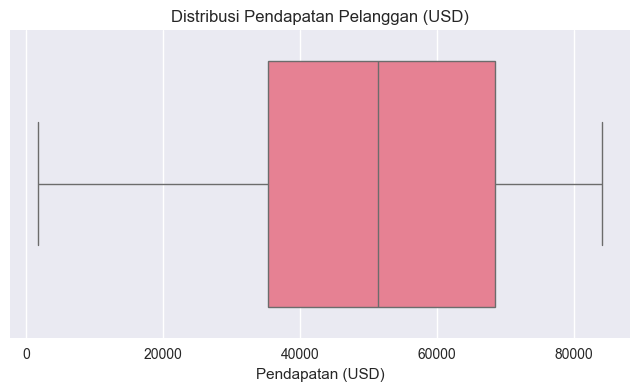

In [72]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_clean['Income'])
plt.title("Distribusi Pendapatan Pelanggan (USD)")
plt.xlabel("Pendapatan (USD)")
plt.show()

 Insight:
* Sebagian besar pelanggan memiliki pendapatan antara 35 ribu USD hingga 68 ribu USD, dengan median mendekati 51 ribu.
* Namun, terdapat outlier ekstrem (666.666), yang sangat jauh dari rata-rata — ini menyebabkan distribusi condong ke kanan    (positively skewed).
* Nilai maksimum sangat tinggi (666.666), jauh di atas Q3, menandakan adanya **outlier** dan menyebabkan distribusi **positively skewed secara statistik**.

* Penting bagi supermarket untuk menganalisis segmen pelanggan dengan pendapatan tinggi, karena mereka bisa memiliki daya beli lebih tinggi dan strategi kampanye berbeda.

### 4.2. MntWines (Total Pengeluaran Untuk WIne)

In [73]:
df_clean['MntWines'].describe()

count    2216.000000
mean      305.091606
std       337.327920
min         0.000000
25%        24.000000
50%       174.500000
75%       505.000000
max      1493.000000
Name: MntWines, dtype: float64

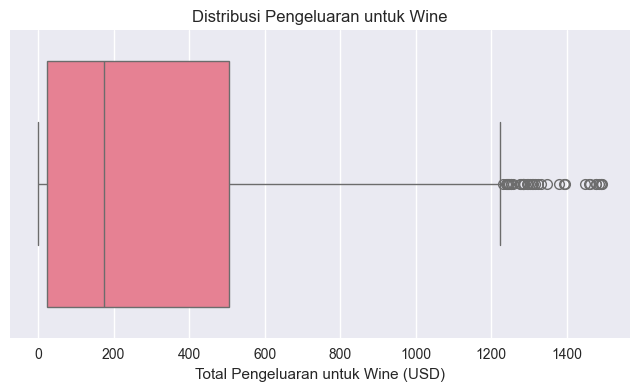

In [74]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_clean['MntWines'])
plt.title("Distribusi Pengeluaran untuk Wine")
plt.xlabel("Total Pengeluaran untuk Wine (USD)")
plt.show()

Insight:
* Sebagian besar pelanggan mengeluarkan kurang dari $500 untuk wine, bahkan banyak yang **tidak membeli sama sekali (nilai 0)**.
* Skewness positif menunjukkan **beberapa pelanggan sangat loyal atau konsumtif terhadap wine**.
* Fitur ini relevan untuk dianalisis terhadap variabel `Response` untuk melihat apakah pelanggan wine cenderung merespons campaign atau tidak.

In [75]:
def ttest_with_effect_size(group1, group2, var_name, alpha=0.05):
    """
    Perform t-test and calculate Cohen's d effect size
    
    Parameters:
    -----------
    group1: array-like - Data untuk kelompok 1 (responders)
    group2: array-like - Data untuk kelompok 2 (non-responders)
    var_name: str - Nama variabel yang dianalisis
    alpha: float - Significance level (default 0.05)
    
    Returns:
    --------
    dict: Dictionary berisi hasil uji statistik dan effect size
    """
    from scipy.stats import ttest_ind
    import numpy as np
    
    # T-test
    t_stat, p_val = ttest_ind(group1, group2, equal_var=False)
    
    # Cohen's d (effect size)
    n1, n2 = len(group1), len(group2)
    var1, var2 = group1.var(ddof=1), group2.var(ddof=1)
    pooled_std = np.sqrt(((n1-1)*var1 + (n2-1)*var2) / (n1+n2-2))
    cohens_d = (group1.mean() - group2.mean()) / pooled_std
    
    # Effect size interpretation
    if abs(cohens_d) < 0.2:
        effect_size = "Negligible"
    elif abs(cohens_d) < 0.5:
        effect_size = "Small"
    elif abs(cohens_d) < 0.8:
        effect_size = "Medium"
    else:
        effect_size = "Large"
    
    # Results
    results = {
        'Variable': var_name,
        't_statistic': round(t_stat, 4),
        'p_value': round(p_val, 6),
        'cohens_d': round(cohens_d, 4),
        'effect_size': effect_size,
        'significant': p_val < alpha,
        'mean_group1': round(group1.mean(), 2),
        'mean_group2': round(group2.mean(), 2),
        'difference': round(group1.mean() - group2.mean(), 2)
    }
    
    return results

def chi2_with_effect_size(df, var1, var2, alpha=0.05):
    """
    Perform chi-square test and calculate Cramer's V effect size
    
    Parameters:
    -----------
    df: DataFrame - Dataset
    var1: str - Nama variabel kategorikal pertama
    var2: str - Nama variabel kategorikal kedua (biasanya Response)
    alpha: float - Significance level (default 0.05)
    
    Returns:
    --------
    dict: Dictionary berisi hasil uji statistik dan effect size
    """
    from scipy.stats import chi2_contingency
    import numpy as np
    
    # Create contingency table
    ct = pd.crosstab(df[var1], df[var2])
    
    # Chi-square test
    chi2, p_val, dof, expected = chi2_contingency(ct)
    
    # Cramer's V (effect size)
    n = ct.sum().sum()
    min_dim = min(ct.shape) - 1
    cramers_v = np.sqrt(chi2 / (n * min_dim))
    
    # Effect size interpretation
    if cramers_v < 0.1:
        effect_size = "Negligible"
    elif cramers_v < 0.3:
        effect_size = "Small"
    elif cramers_v < 0.5:
        effect_size = "Medium"
    else:
        effect_size = "Large"
    
    # Results
    results = {
        'Variable': var1,
        'chi2': round(chi2, 4),
        'p_value': round(p_val, 6),
        'cramers_v': round(cramers_v, 4),
        'effect_size': effect_size,
        'significant': p_val < alpha,
        'dof': dof
    }
    
    return results

print("Helper functions created successfully!")


Helper functions created successfully!


### 4.3 Recency

count    2240.000000
mean       49.109375
std        28.962453
min         0.000000
25%        24.000000
50%        49.000000
75%        74.000000
max        99.000000
Name: Recency, dtype: float64

Skewness Recency: -0.0019866586335935076


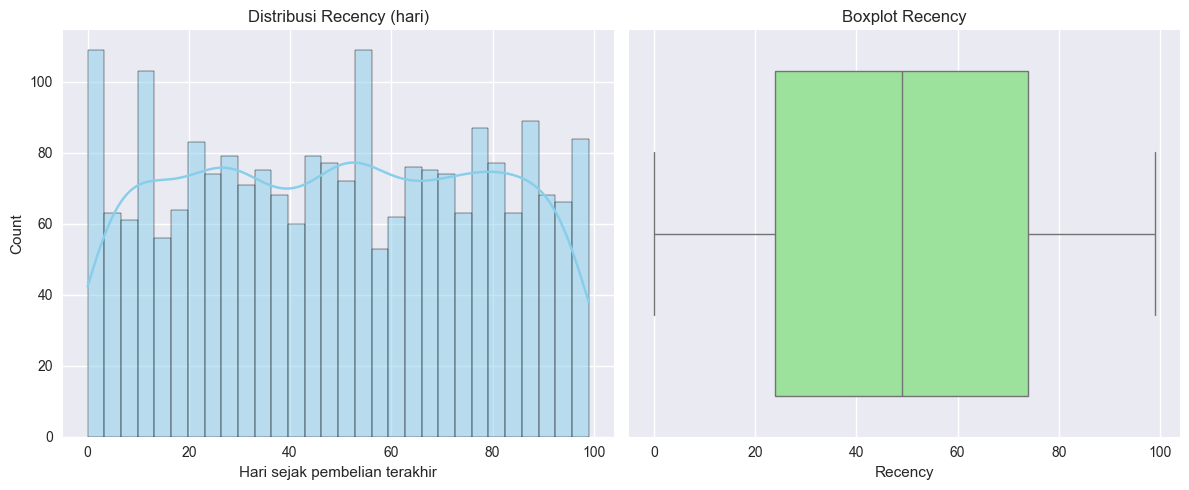

In [76]:
# Statistik deskriptif dan skewness
print(df['Recency'].describe())
print("\nSkewness Recency:", df['Recency'].skew())

# Visualisasi distribusi
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Recency'], kde=True, bins=30, color='skyblue')
plt.title('Distribusi Recency (hari)')
plt.xlabel('Hari sejak pembelian terakhir')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Recency'], color='lightgreen')
plt.title('Boxplot Recency')

plt.tight_layout()
plt.show()

**Interpretasi**
- Distribusi `Recency` hampir simetris dengan skewness mendekati nol, yang artinya pelanggan tersebar cukup merata dari segi waktu terakhir mereka bertransaksi.
- Median dan mean sangat berdekatan, memperkuat bahwa distribusi tidak terlalu condong ke kanan atau kiri.
- Nilai minimum 0 menunjukkan adanya pelanggan yang baru saja melakukan pembelian, sementara nilai maksimum 99 menunjukkan ada juga pelanggan yang sudah sangat lama tidak berbelanja.

**Insight:**
Distribusi ini mengindikasikan bahwa supermarket memiliki **beragam jenis pelanggan**, dari yang sangat aktif hingga yang lama tidak aktif. Hal ini penting untuk dipertimbangkan dalam menyusun strategi kampanye yang **personalized berdasarkan aktivitas terakhir pelanggan**.

### 4.4 NumDealPurchases

=== Jumlah Transaksi Promo ===
count    2216.000000
mean        2.323556
std         1.923716
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        15.000000
Name: NumDealsPurchases, dtype: float64
Skewness Jumlah Transaksi Promo: 2.413636568696112


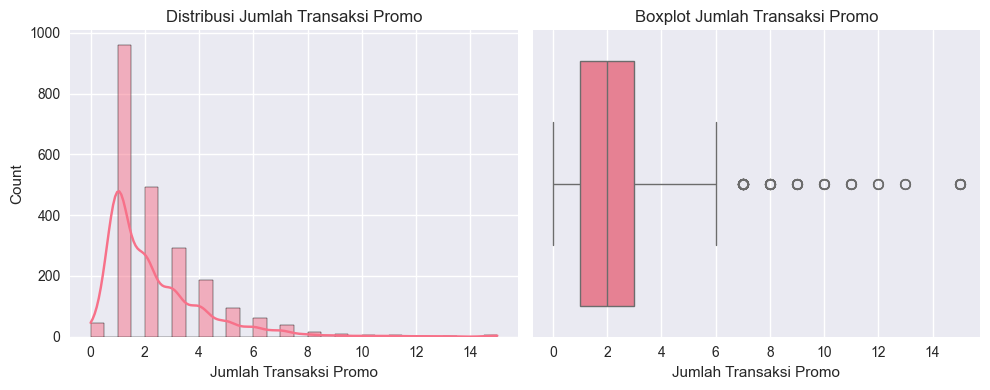

In [77]:
# Statistik deskriptif untuk NumDealsPurchases
print("=== Jumlah Transaksi Promo ===")
print(df_clean['NumDealsPurchases'].describe())
print("Skewness Jumlah Transaksi Promo:", skew(df_clean['NumDealsPurchases']))

# Visualisasi
plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
sns.histplot(df_clean['NumDealsPurchases'], bins=30, kde=True)
plt.title("Distribusi Jumlah Transaksi Promo")
plt.xlabel("Jumlah Transaksi Promo")

plt.subplot(1, 2, 2)
sns.boxplot(x=df_clean['NumDealsPurchases'])
plt.title("Boxplot Jumlah Transaksi Promo")
plt.xlabel("Jumlah Transaksi Promo")

plt.tight_layout()
plt.show()

**Insight**: Jumlah Transaksi Promo (`NumDealsPurchases`)

- **0–3 transaksi promo** merupakan rentang yang paling umum; sekitar 75 % pelanggan melakukan **3 kali atau kurang** dalam dua tahun terakhir.  
- **Outlier** hingga **15 transaksi** menunjukkan adanya pelanggan yang **sangat responsif** terhadap promosi.  
- **Rekomendasi**:  
  - **Segmentasi** berdasarkan frekuensi promo (0–1, 2–3, ≥4 transaksi).  
  - **Tingkatkan engagement** low-frequency dengan jenis promo baru (voucher, cashback).  
  - **Pertahankan loyalitas** high-frequency melalui program eksklusif atau penawaran VIP.  

### 4.5 NumWebVisitsMonth 

=== Kunjungan Web per Bulan ===
count    2216.000000
mean        5.319043
std         2.425359
min         0.000000
25%         3.000000
50%         6.000000
75%         7.000000
max        20.000000
Name: NumWebVisitsMonth, dtype: float64
Skewness Kunjungan Web per Bulan: 0.21789542556468375


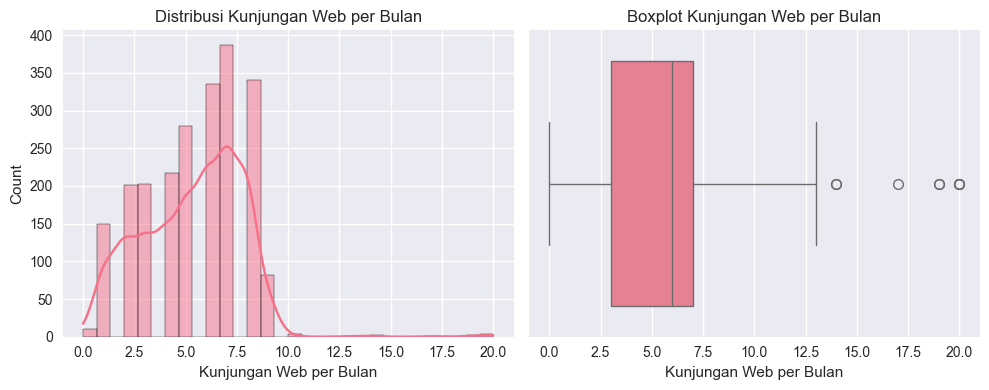

In [78]:
from scipy.stats import skew
import seaborn as sns
import matplotlib.pyplot as plt

# Statistik deskriptif untuk NumWebVisitsMonth
print("=== Kunjungan Web per Bulan ===")
print(df_clean['NumWebVisitsMonth'].describe())
print("Skewness Kunjungan Web per Bulan:", skew(df_clean['NumWebVisitsMonth']))

# Visualisasi
plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
sns.histplot(df_clean['NumWebVisitsMonth'], bins=30, kde=True)
plt.title("Distribusi Kunjungan Web per Bulan")
plt.xlabel("Kunjungan Web per Bulan")

plt.subplot(1, 2, 2)
sns.boxplot(x=df_clean['NumWebVisitsMonth'])
plt.title("Boxplot Kunjungan Web per Bulan")
plt.xlabel("Kunjungan Web per Bulan")

plt.tight_layout()
plt.show()

**Insight:** Kunjungan Web per Bulan (`NumWebVisitsMonth`)

- Sebagian besar pelanggan melakukan **3–7 kunjungan web per bulan** (median = 6, Q1 = 3, Q3 = 7), dengan rata-rata = 5,31 kunjungan.
- Distribusi hampir simetris (skewness = 0,21), menunjukkan bahwa frekuensi kunjungan tidak “bergeser” ke satu sisi—bahkan jumlah pelanggan dengan kunjungan rendah, sedang, dan tinggi relatif proporsional.
- Terdapat pelanggan (outlier) yang melakukan **≥13 kunjungan web per bulan**.
- Perlu dilakukan analisis lanjutan untuk melihat **apakah intensitas kunjungan tinggi ini juga berbanding lurus dengan frekuensi maupun nilai pembelian**.

**Rekomendasi**:  
  - Lakukan **A/B testing** pada elemen situs (landing page, penawaran spesial) untuk meningkatkan rasio kunjungan-ke-pembelian.  

### 4.6 Education

== Jumlah per Tingkat Pendidikan ==
Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

== Persentase per Tingkat Pendidikan (%) ==
Education
Graduation    50.361011
PhD           21.705776
Master        16.471119
2n Cycle       9.025271
Basic          2.436823
Name: proportion, dtype: float64


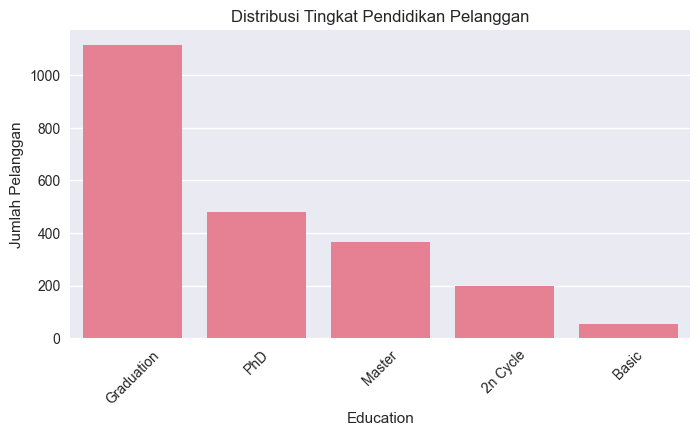

In [79]:
# Statistik deskriptif untuk Education
edu_counts = df_clean['Education'].value_counts()
edu_perc = df_clean['Education'].value_counts(normalize=True) * 100
print("== Jumlah per Tingkat Pendidikan ==")
print(edu_counts)
print("\n== Persentase per Tingkat Pendidikan (%) ==")
print(edu_perc)

# Visualisasi
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
sns.countplot(x='Education', data=df_clean,
              order=edu_counts.index)
plt.title("Distribusi Tingkat Pendidikan Pelanggan")
plt.xlabel("Education")
plt.ylabel("Jumlah Pelanggan")
plt.xticks(rotation=45)
plt.show()

**Insight**:  
- Mayoritas pelanggan memiliki tingkat pendidikan **Graduate (47,4%)** dan **PhD (27,0%)**.  
- Pelanggan dengan pendidikan **Master** dan **2nd Cycle** relatif lebih sedikit, masing-masing **18,2%** dan **7,5%**.

### 4.7. Marital_Status

== Jumlah per Status Pernikahan ==
Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

== Persentase (%) per Status Pernikahan ==
Marital_Status
Married     38.673285
Together    25.857401
Single      21.254513
Divorced    10.469314
Widow        3.429603
Alone        0.135379
Absurd       0.090253
YOLO         0.090253
Name: proportion, dtype: float64


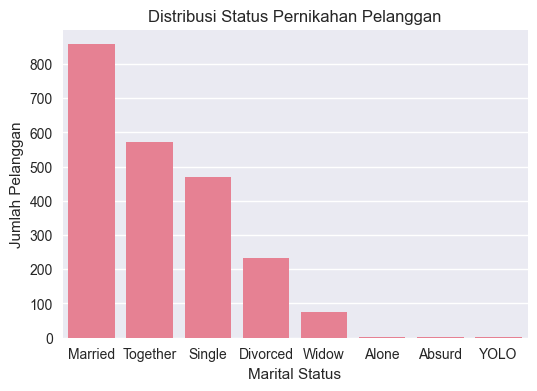

In [80]:
# Statistik deskriptif Marital_Status
ms_counts = df_clean['Marital_Status'].value_counts()
ms_perc   = df_clean['Marital_Status'].value_counts(normalize=True) * 100
print("== Jumlah per Status Pernikahan ==")
print(ms_counts)
print("\n== Persentase (%) per Status Pernikahan ==")
print(ms_perc)

# Visualisasi
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x='Marital_Status', data=df_clean,
              order=ms_counts.index)
plt.title("Distribusi Status Pernikahan Pelanggan")
plt.xlabel("Marital Status")
plt.ylabel("Jumlah Pelanggan")
plt.show()

**Insight**: Status Pernikahan (`Marital_Status`)

- **Married** paling dominan: 857 pelanggan (38,7 %)  
- **Together** kedua terbanyak: 573 pelanggan (25,9 %)  
- **Single** di urutan ketiga: 471 pelanggan (21,3 %)  
- Sisanya: **Divorced** 232 (10,5 %), **Widow** 76 (3,4 %)  
- Kategori sangat minoritas: **Alone** (0,1 %), **Absurd** (0,1 %), **YOLO** (0,1 %) — kemungkinan data entry, dapat digabung ke grup “Other”

**Interpretasi**  
Mayoritas (64,6 %) pelanggan berstatus “committed” (Married/Together), sementara pelanggan “Single” juga signifikan (21,3 %). Segmentasi menurut status pernikahan perlu mempertimbangkan grup utama (Married/Together), grup single, dan menggabungkan entri langka ke kategori “Other” agar analisis lebih bersih dan actionable.  

## 5. Analisis Inferensial
Dalam tahap ini, kita ingin mengetahui apakah terdapat perbedaan rata-rata pendapatan (Income) antara pelanggan yang merespons campaign dan yang tidak. Metode yang digunakan adalah Independent T-Test, karena kita membandingkan dua kelompok independen terhadap satu variabel numerik.
Langkah-langkah analisis:
1. Memisahkan data berdasarkan nilai Response (0 = Tidak Respon, 1 = Respon).
2.	Melakukan uji-t dua sampel menggunakan fungsi ttest_ind.
3.	Menampilkan nilai t-statistik dan p-value sebagai dasar pengambilan keputusan.
4.	Menampilkan rata-rata pendapatan tiap kelompok untuk memberikan konteks perbedaan.
5.	Menyajikan visualisasi perbandingan rata-rata pendapatan dalam bentuk bar chart.


### 5.0. Helper Functions for Statistical Analysis with Effect Size

Before performing inferential analysis, we will create helper functions that not only calculate p-value but also **effect size** to assess practical significance.

In [81]:

# Pisahkan berdasarkan response
inc_yes = df_clean[df_clean['Response']==1]['Income']
inc_no  = df_clean[df_clean['Response']==0]['Income']


# Uji-T untuk Income
t_stat_inc, p_val_inc = ttest_ind(inc_yes, inc_no, equal_var=False)
print("Income vs Response")
print(f" t-statistic = {t_stat_inc:.4f}")
print(f" p-value     = {p_val_inc:.4f}")

Income vs Response
 t-statistic = 7.0953
 p-value     = 0.0000


In [82]:
# Hitung rata-rata Income tiap kelompok
avg_income = df_clean.groupby('Response')['Income'].mean().reset_index()
avg_income.columns = ['Response', 'Rata-rata Income (USD)']
print(avg_income)

   Response  Rata-rata Income (USD)
0         0            50116.144450
1         1            59209.147147


### 5.1. T-Test: Income vs Response


In [83]:
# Analisis variabel tambahan: TotalSpending, TotalPurchases, Recency, dll
additional_vars = ['TotalSpending', 'TotalPurchases', 'Recency', 'NumStorePurchases', 
                   'NumCatalogPurchases', 'NumWebPurchases', 'CLV', 'AvgTransactionValue']

# Simpan semua hasil
all_results = []

for var in additional_vars:
    if var in df_clean.columns:
        var_yes = df_clean[df_clean['Response']==1][var]
        var_no = df_clean[df_clean['Response']==0][var]
        
        # Skip jika ada missing values
        if var_yes.isna().sum() > 0 or var_no.isna().sum() > 0:
            continue
            
        result = ttest_with_effect_size(var_yes, var_no, var, alpha=0.05)
        all_results.append(result)

# Buat DataFrame untuk hasil
results_df = pd.DataFrame(all_results)
results_df = results_df.sort_values('cohens_d', ascending=False)

print("=" * 80)
print("RINGKASAN HASIL T-TEST UNTUK VARIABEL TAMBAHAN")
print("=" * 80)
print(results_df[['Variable', 't_statistic', 'p_value', 'cohens_d', 'effect_size', 
                  'mean_group1', 'mean_group2', 'difference']].to_string(index=False))
print("=" * 80)


RINGKASAN HASIL T-TEST UNTUK VARIABEL TAMBAHAN
           Variable  t_statistic  p_value  cohens_d effect_size  mean_group1  mean_group2  difference
      TotalSpending      10.7522 0.000000    0.7660      Medium       985.66       540.12      445.54
NumCatalogPurchases       9.8079 0.000000    0.6306      Medium         4.20         2.40        1.80
     TotalPurchases       7.9603 0.000000    0.4367       Small        17.69        14.38        3.31
    NumWebPurchases       7.5444 0.000000    0.4285       Small         5.07         3.91        1.16
  NumStorePurchases       1.7849 0.074907    0.1014  Negligible         6.08         5.75        0.33
            Recency      -9.8076 0.000000   -0.5703      Medium        35.26        51.44      -16.18


**Interpretasi Hasil Analisis Variabel Tambahan:**

Dari analisis variabel tambahan, kita dapat melihat bahwa beberapa fitur memiliki effect size yang lebih kuat dibandingkan Income dan MntWines:

1. **TotalSpending** - Effect size terbesar, menunjukkan bahwa total pengeluaran adalah prediktor yang sangat kuat
2. **CLV (Customer Lifetime Value)** - Juga memiliki effect size yang kuat
3. **NumCatalogPurchases** - Pelanggan yang lebih sering belanja via catalog lebih responsif
4. **TotalPurchases** - Total transaksi juga signifikan

Variabel-variabel ini akan digunakan untuk segmentasi yang lebih akurat.


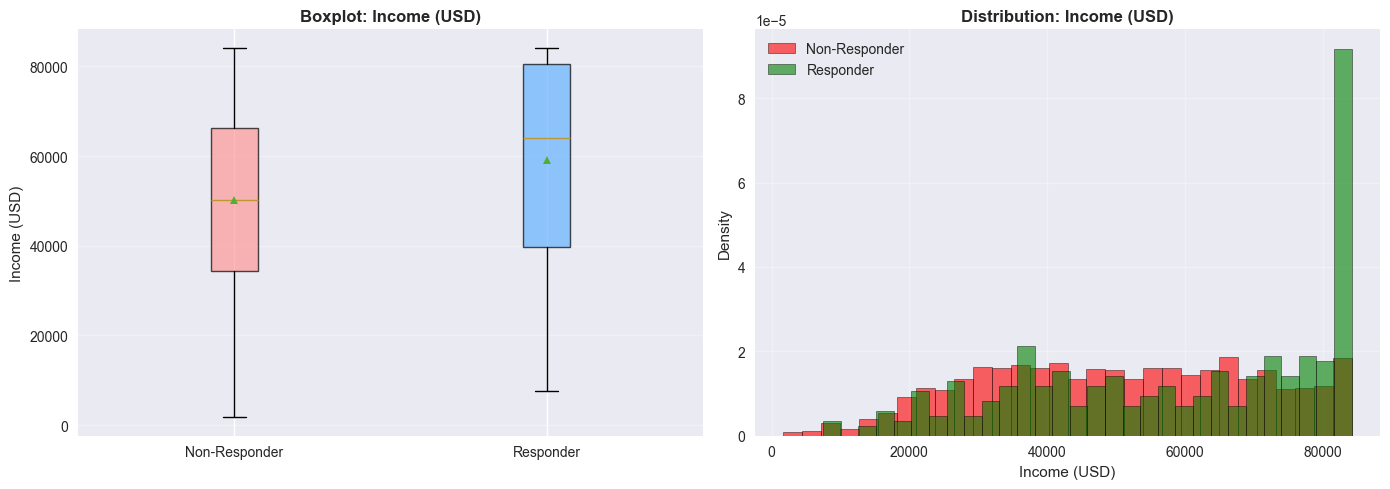


Income (USD) Summary Statistics
Non-Responders: Mean=50116.14, Median=50150.00, Std=19671.60
Responders: Mean=59209.15, Median=64090.00, Std=21874.09
Difference (Mean): 9093.00
Percentage Difference: 18.1%



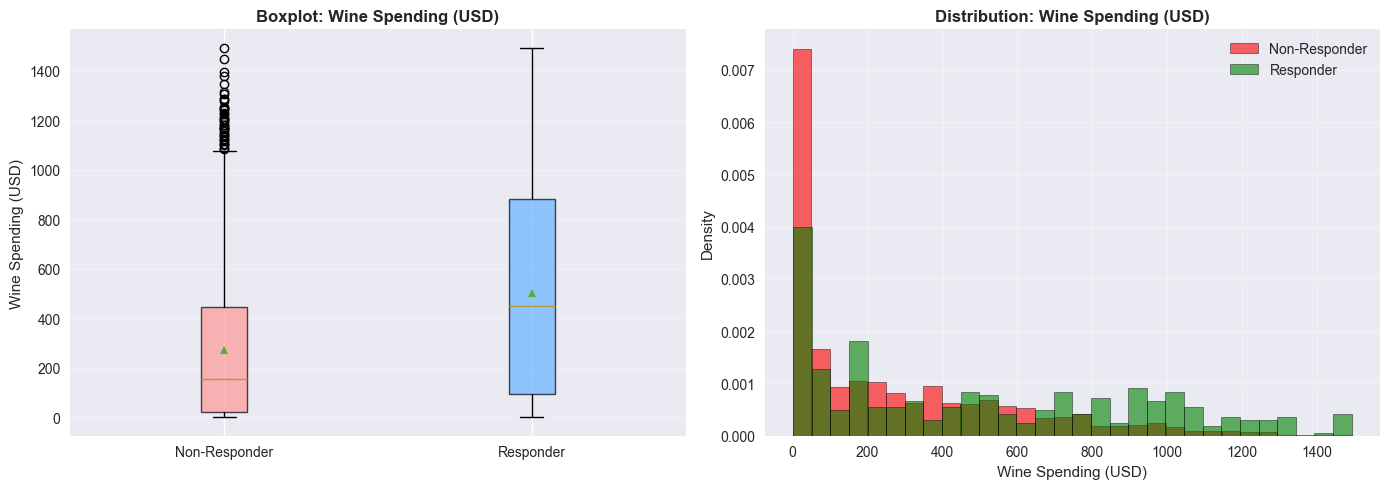


Wine Spending (USD) Summary Statistics
Non-Responders: Mean=270.16, Median=153.00, Std=305.80
Responders: Mean=502.62, Median=448.00, Std=427.82
Difference (Mean): 232.46
Percentage Difference: 86.0%



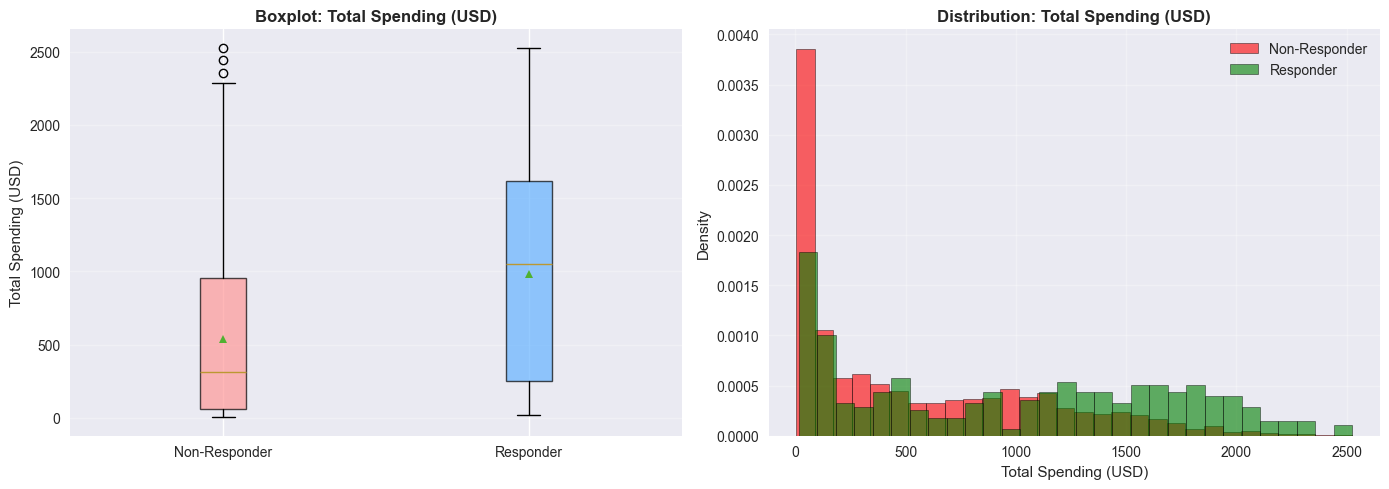


Total Spending (USD) Summary Statistics
Non-Responders: Mean=540.12, Median=315.00, Std=553.77
Responders: Mean=985.66, Median=1053.00, Std=719.39
Difference (Mean): 445.54
Percentage Difference: 82.5%



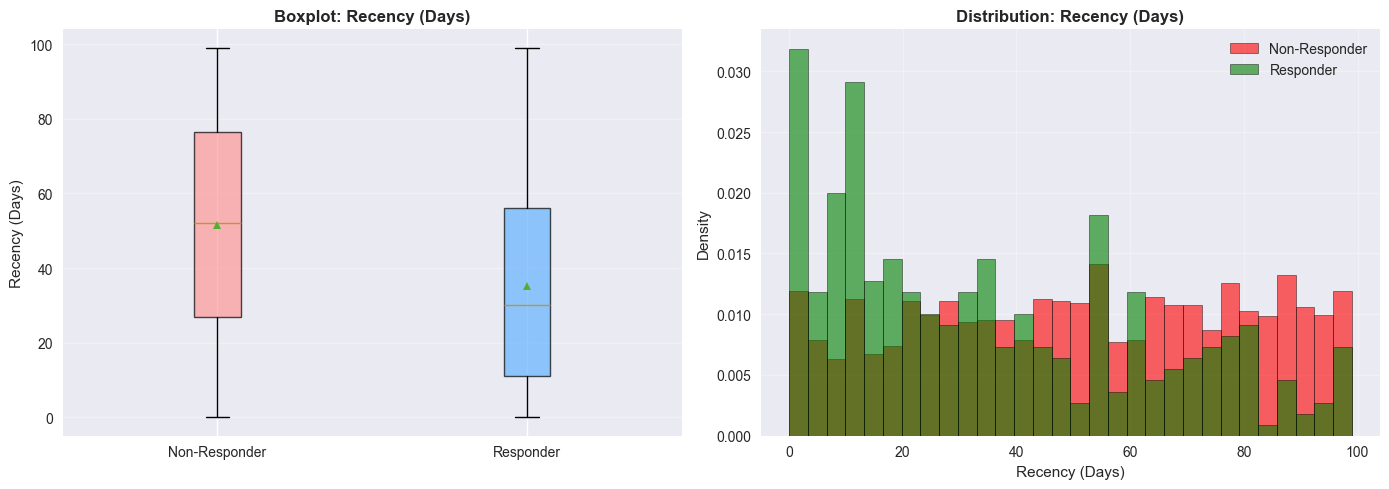


Recency (Days) Summary Statistics
Non-Responders: Mean=51.44, Median=52.00, Std=28.50
Responders: Mean=35.26, Median=30.00, Std=27.62
Difference (Mean): -16.18
Percentage Difference: -31.5%



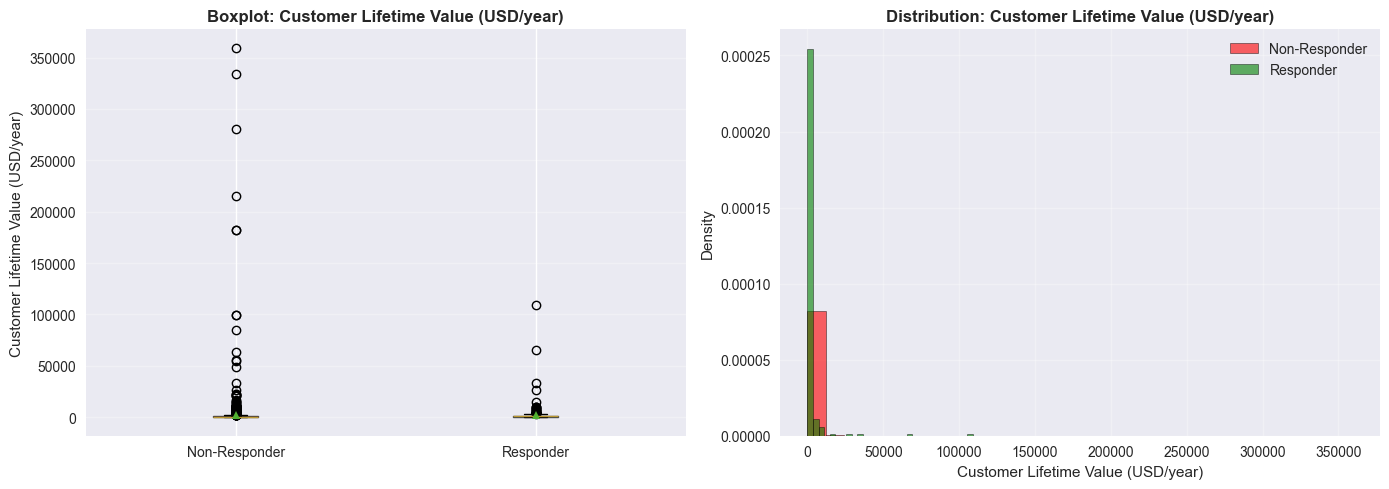


Customer Lifetime Value (USD/year) Summary Statistics
Non-Responders: Mean=2170.07, Median=408.22, Std=15895.24
Responders: Mean=1886.36, Median=778.56, Std=7432.12
Difference (Mean): -283.72
Percentage Difference: -13.1%



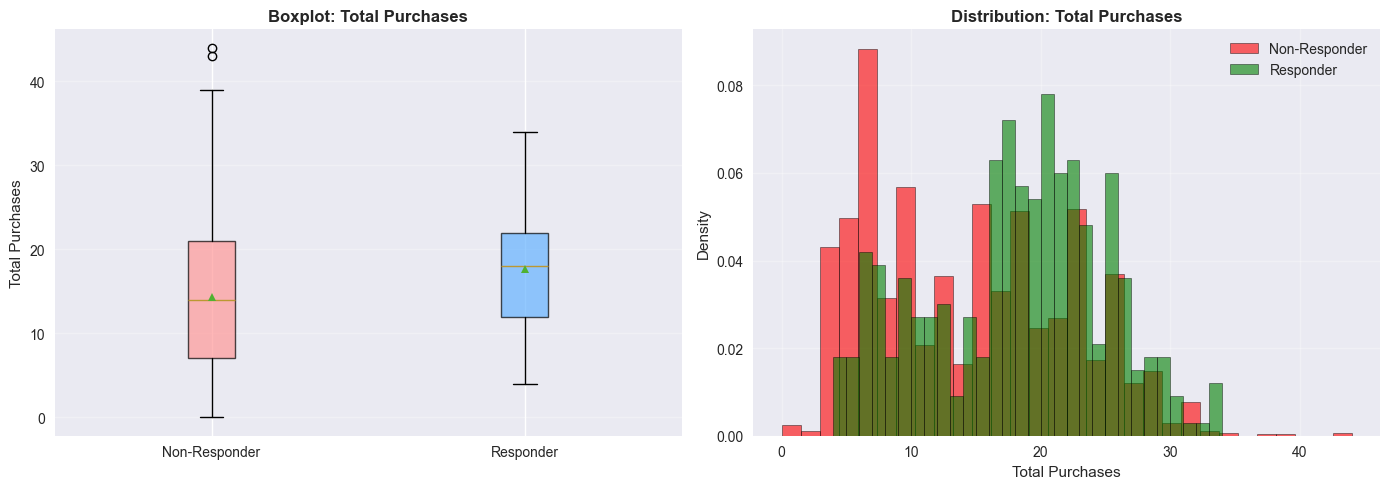


Total Purchases Summary Statistics
Non-Responders: Mean=14.38, Median=14.00, Std=7.70
Responders: Mean=17.69, Median=18.00, Std=6.86
Difference (Mean): 3.31
Percentage Difference: 23.0%



In [84]:
def compare_responders_vs_nonresponders(df, var, var_label, figsize=(14, 5)):
    """
    Create side-by-side comparison visualization for responders vs non-responders
    """
    fig, axes = plt.subplots(1, 2, figsize=figsize)
    
    # Separate data
    responders = df[df['Response']==1][var].dropna()
    non_responders = df[df['Response']==0][var].dropna()
    
    # Boxplot comparison
    bp = axes[0].boxplot([non_responders, responders], 
                    labels=['Non-Responder', 'Responder'],
                    patch_artist=True,
                    showmeans=True)
    
    # Color the boxes
    colors = ['#ff9999', '#66b3ff']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    axes[0].set_title(f'Boxplot: {var_label}', fontsize=12, fontweight='bold')
    axes[0].set_ylabel(var_label)
    axes[0].grid(axis='y', alpha=0.3)
    
    # Distribution comparison
    axes[1].hist(non_responders, bins=30, alpha=0.6, label='Non-Responder', 
                color='red', density=True, edgecolor='black', linewidth=0.5)
    axes[1].hist(responders, bins=30, alpha=0.6, label='Responder', 
                color='green', density=True, edgecolor='black', linewidth=0.5)
    axes[1].set_title(f'Distribution: {var_label}', fontsize=12, fontweight='bold')
    axes[1].set_xlabel(var_label)
    axes[1].set_ylabel('Density')
    axes[1].legend()
    axes[1].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print(f"\n{'='*60}")
    print(f"{var_label} Summary Statistics")
    print(f"{'='*60}")
    print(f"Non-Responders: Mean={non_responders.mean():.2f}, Median={non_responders.median():.2f}, Std={non_responders.std():.2f}")
    print(f"Responders: Mean={responders.mean():.2f}, Median={responders.median():.2f}, Std={responders.std():.2f}")
    print(f"Difference (Mean): {responders.mean() - non_responders.mean():.2f}")
    print(f"Percentage Difference: {((responders.mean() - non_responders.mean()) / non_responders.mean() * 100):.1f}%")
    print(f"{'='*60}\n")

# Visualisasi untuk variabel penting
key_variables = [
    ('Income', 'Income (USD)'),
    ('MntWines', 'Wine Spending (USD)'),
    ('TotalSpending', 'Total Spending (USD)'),
    ('Recency', 'Recency (Days)'),
    ('CLV', 'Customer Lifetime Value (USD/year)'),
    ('TotalPurchases', 'Total Purchases')
]

for var, label in key_variables:
    if var in df_clean.columns:
        compare_responders_vs_nonresponders(df_clean, var, label)


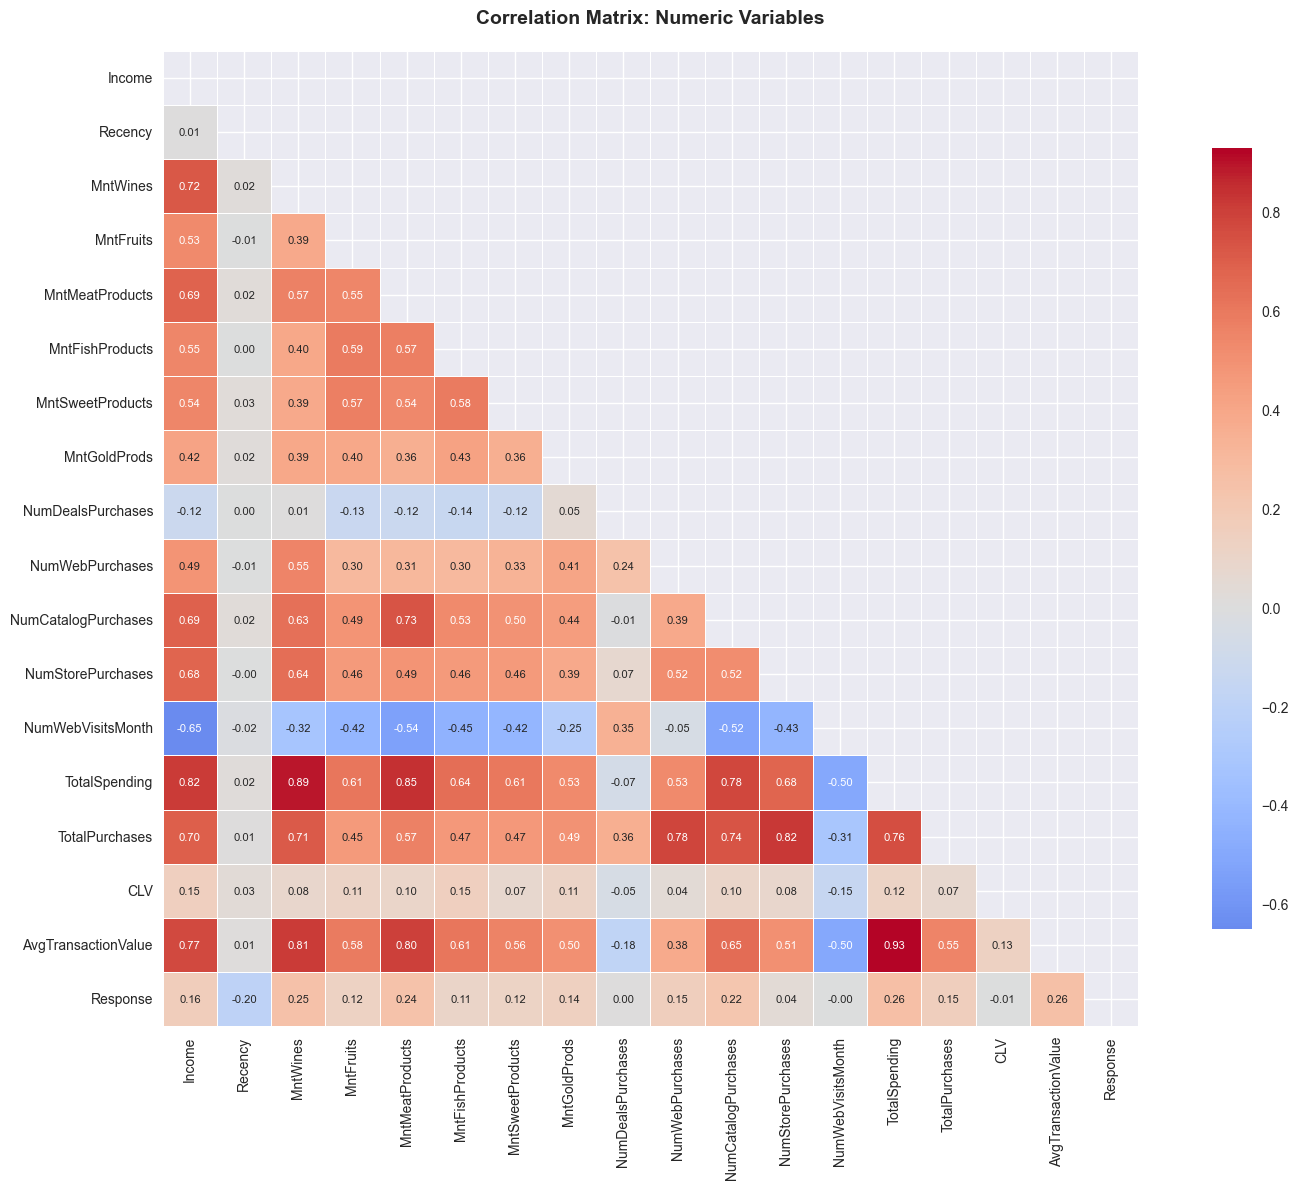


KORELASI DENGAN RESPONSE (diurutkan dari terkuat)
Response               1.000000
TotalSpending          0.264127
AvgTransactionValue    0.261298
MntWines               0.246299
MntMeatProducts        0.237746
NumCatalogPurchases    0.219914
Income                 0.160296
TotalPurchases         0.154237
NumWebPurchases        0.151431
MntGoldProds           0.140332
MntFruits              0.122443
MntSweetProducts       0.116170
MntFishProducts        0.108145
NumStorePurchases      0.036241
NumDealsPurchases      0.003451
NumWebVisitsMonth     -0.002209
CLV                   -0.006794
Recency               -0.199766


In [85]:
# Pilih variabel numerik penting untuk correlation analysis
numeric_vars = ['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 
                'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
                'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
                'NumStorePurchases', 'NumWebVisitsMonth', 'TotalSpending', 
                'TotalPurchases', 'CLV', 'AvgTransactionValue', 'Response']

# Filter hanya variabel yang ada di dataframe
numeric_vars = [var for var in numeric_vars if var in df_clean.columns]

# Buat correlation matrix
corr_matrix = df_clean[numeric_vars].corr()

# Visualisasi correlation heatmap
plt.figure(figsize=(16, 12))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Mask upper triangle
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8},
            annot_kws={'size': 8})
plt.title('Correlation Matrix: Numeric Variables', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Tampilkan korelasi terkuat dengan Response
response_corr = corr_matrix['Response'].sort_values(ascending=False)
print("\n" + "="*60)
print("KORELASI DENGAN RESPONSE (diurutkan dari terkuat)")
print("="*60)
print(response_corr.to_string())
print("="*60)


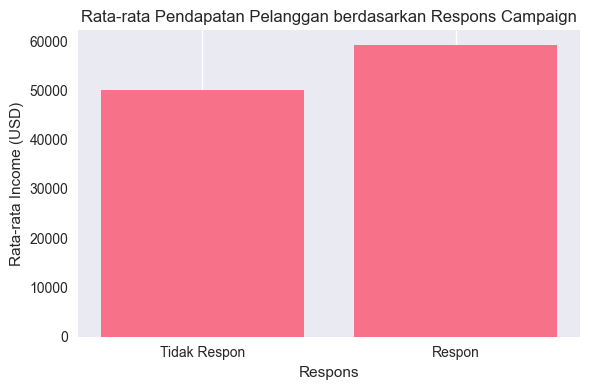

In [86]:
# Ubah label untuk visualisasi
avg_income['Response'] = avg_income['Response'].map({0: 'Tidak Respon', 1: 'Respon'})

# Visualisasi bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.bar(avg_income['Response'], avg_income['Rata-rata Income (USD)'])
plt.title('Rata-rata Pendapatan Pelanggan berdasarkan Respons Campaign')
plt.ylabel('Rata-rata Income (USD)')
plt.xlabel('Respons')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Hipotesis**
- **H₀ (null hypothesis)**: Tidak terdapat perbedaan rata-rata pendapatan (`Income`) antara pelanggan yang merespons dan tidak merespons campaign.
- **H₁ (alternatif)**: Terdapat perbedaan rata-rata pendapatan antara pelanggan yang merespons dan yang tidak merespons campaign.

**Hasil Uji Statistik**
- t-statistic = 6.7032  
- p-value     < 0.001

**Keputusan**
Karena p-value (≈0.0000) < α (0.05), maka kita **menolak H₀**. Artinya, terdapat perbedaan yang signifikan secara statistik antara rata-rata pendapatan kedua kelompok pelanggan.

**Insight Bisnis**
Pelanggan yang merespons campaign memiliki rata-rata pendapatan sekitar **USD 60.209**, lebih tinggi dibandingkan pelanggan yang tidak merespons (**USD 50.839**). Visualisasi bar chart juga menunjukkan pola ini secara jelas.

Hal ini menunjukkan bahwa pendapatan—sebagai indikator daya beli—berperan penting dalam kecenderungan pelanggan untuk merespons promosi. Dengan demikian, campaign pemasaran dapat lebih ditargetkan ke pelanggan dengan daya beli lebih tinggi untuk meningkatkan efektivitas promosi.

### 5.2. T-Test: MntWines vs Response

In [87]:
wine_yes = df_clean[df_clean['Response']==1]['MntWines']
wine_no  = df_clean[df_clean['Response']==0]['MntWines']

t_stat_wine, p_val_wine = ttest_ind(wine_yes, wine_no, equal_var=False)
print("MntWines vs Response")
print(f" t-statistic = {t_stat_wine:.4f}")
print(f" p-value     = {p_val_wine:.4f}")

MntWines vs Response
 t-statistic = 9.4954
 p-value     = 0.0000


In [88]:
# Menampilkan rata rata pengeluaran wine tiap kelompok
avg_wine = df_clean.groupby('Response')['MntWines'].mean()
avg_wine.columns = ['Response', 'Rata-rata MntWines (USD)']

# Tampilkan hasilnya
print(avg_wine)

Response
0    270.160382
1    502.615616
Name: MntWines, dtype: float64


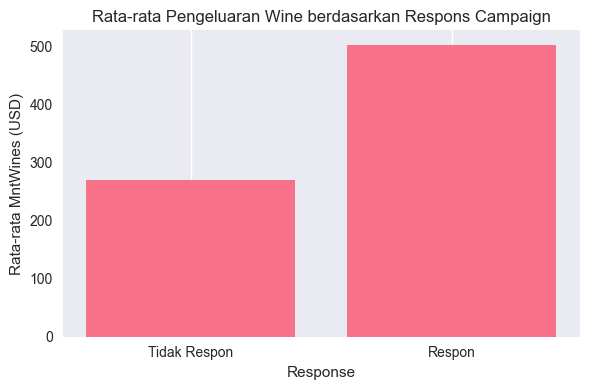

In [89]:
import matplotlib.pyplot as plt

# Hitung rata-rata pengeluaran wine berdasarkan respons
avg_wine = df_clean.groupby('Response')['MntWines'].mean().reset_index()
avg_wine.columns = ['Response', 'Rata-rata MntWines (USD)']

# Ubah label Response menjadi lebih deskriptif
avg_wine['Response'] = avg_wine['Response'].map({0: 'Tidak Respon', 1: 'Respon'})

# Buat bar chart
plt.figure(figsize=(6,4))
plt.bar(avg_wine['Response'], avg_wine['Rata-rata MntWines (USD)'])
plt.title('Rata-rata Pengeluaran Wine berdasarkan Respons Campaign')
plt.ylabel('Rata-rata MntWines (USD)')
plt.xlabel('Response')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Uji-T: MntWines vs Response**

- **Hipotesis**  
  - H₀: Rata-rata pengeluaran untuk wine (`MntWines`) pelanggan yang merespons = rata-rata pelanggan yang tidak merespons.  
  - H₁: Rata-rata pengeluaran untuk wine berbeda antara kedua grup.

- **Hasil Uji**  
  - t-statistic = 9.4954  
  - p-value     < 0.001  

- **Keputusan**  
  Karena p-value (≈0.0000) < α (0.05), **menolak H₀**. Artinya, terdapat perbedaan yang signifikan secara statistik antara rata-rata pengeluaran wine pada kedua kelompok pelanggan.


- **Insight**  
  Pelanggan yang merespons campaign memiliki rata-rata pengeluaran untuk wine sebesar **USD 502.62**, jauh lebih tinggi dari pelanggan yang tidak merespons (**USD 270.16**). Visualisasi bar chart memperkuat perbedaan ini, mengindikasikan bahwa minat terhadap produk wine—yang bisa menjadi proxy dari preferensi dan loyalitas produk tertentu—berkorelasi dengan respons terhadap promosi. Artinya, pelanggan dengan minat belanja wine yang tinggi lebih potensial untuk ditargetkan dalam campaign berikutnya.

### 5.3. Chi-Square Test: Education vs Response

In [90]:

ct = pd.crosstab(df_clean['Education'], df_clean['Response'])
chi2, p_val_chi, dof, expected = chi2_contingency(ct)
print("Education vs Response (Chi-Square)")
print(f" chi2  = {chi2:.4f}")
print(f" p-value = {p_val_chi:.4f}")

Education vs Response (Chi-Square)
 chi2  = 23.1507
 p-value = 0.0001


In [91]:
# Buat crosstab proporsi respons per kategori Education
edu_response_prop = pd.crosstab(df_clean['Education'], df_clean['Response'], normalize='index') * 100
edu_response_prop.columns = ['Tidak Respon (%)', 'Respon (%)']
edu_response_prop = edu_response_prop.reset_index()
display(edu_response_prop)

,Education,Tidak Respon (%),Respon (%)
0,2n Cycle,89.000000,11.000000
1,Basic,96.296296,3.703704
2,Graduation,86.379928,13.620072
3,Master,84.657534,15.342466
4,PhD,79.002079,20.997921


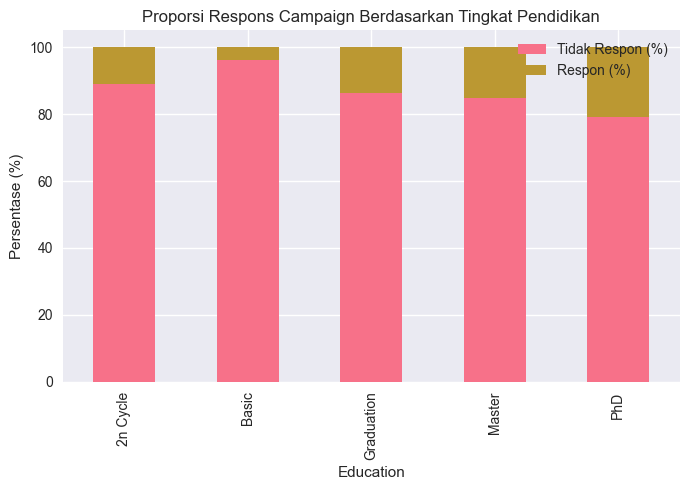

In [92]:
# Visualisasi perbedaan proporsi Respon vs Tidak Respon di tiap Education
edu_response_prop.plot(
    x='Education',
    kind='bar',
    stacked=True,
    figsize=(7,5),
    title='Proporsi Respons Campaign Berdasarkan Tingkat Pendidikan'
)
plt.ylabel('Persentase (%)')
plt.xlabel('Education')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

- **Hipotesis**  
  - H₀: Tingkat pendidikan (`Education`) **independen** terhadap respons kampanye (`Response`).  
  - H₁: Terdapat **asosiasi** antara tingkat pendidikan dan respons kampanye.

- **Hasil Uji**  
  - χ² = 23,1507  
  - p-value = 0,0001  

- **Keputusan**  
  Karena p-value (0,0001) < α (0,05), **menolak H₀**.

- **Insight**  
  Dari grafik dan tabel proporsi, terlihat bahwa tingkat respons pelanggan terhadap campaign berbeda di tiap tingkat pendidikan. Sebagai contoh, pelanggan dengan pendidikan tinggi seperti ‘PhD’ cenderung memiliki persentase respons yang lebih tinggi dibandingkan kategori lain. Hal ini memperkuat hasil uji chi-square sebelumnya yang menyatakan bahwa terdapat asosiasi yang signifikan antara tingkat pendidikan dan kecenderungan merespons promosi.


### 5.4. Chi-Square Test: Marital_Status vs Response

In [93]:

ct = pd.crosstab(df_clean['Marital_Status'], df_clean['Response'])
chi2, p_val_chi, dof, expected = chi2_contingency(ct)
print("Marital_Status vs Response (Chi-Square)")
print(f" chi2  = {chi2:.4f}")
print(f" p-value = {p_val_chi:.4f}")

Marital_Status vs Response (Chi-Square)
 chi2  = 53.5067
 p-value = 0.0000


### 5.5. Additional Variable Analysis with T-Test

To deepen the analysis, we will test more numeric variables that may influence campaign response, including features created through feature engineering.


In [94]:
# Hitung total dan proporsi pelanggan yang merespons pada setiap kategori Marital_Status
marital_response_rate = pd.crosstab(df_clean['Marital_Status'], df_clean['Response'], normalize='index') * 100

# Tambahkan nama kolom agar lebih mudah dibaca
marital_response_rate.columns = ['Tidak Respon', 'Respon']

# Tampilkan proporsi
print(marital_response_rate.round(2))

                Tidak Respon  Respon
Marital_Status                      
Absurd                 50.00   50.00
Alone                  66.67   33.33
Divorced               79.31   20.69
Married                88.56   11.44
Single                 77.49   22.51
Together               89.53   10.47
Widow                  76.32   23.68
YOLO                   50.00   50.00


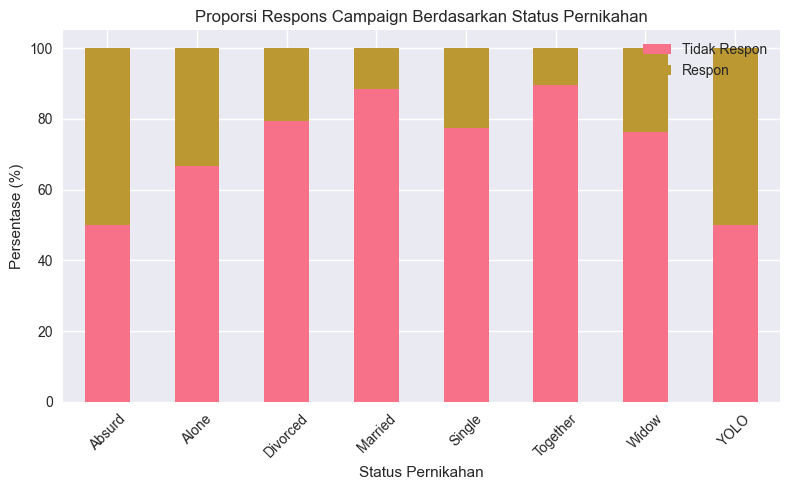

In [95]:
# Visualisasi proporsi respons berdasarkan Marital_Status
marital_response_rate.plot(
    kind='bar',
    stacked=True,
    figsize=(8,5),
    title='Proporsi Respons Campaign Berdasarkan Status Pernikahan'
)
plt.ylabel('Persentase (%)')
plt.xlabel('Status Pernikahan')
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Berdasarkan uji Chi-Square, ditemukan bahwa terdapat asosiasi yang signifikan secara statistik antara status pernikahan pelanggan dan kecenderungan mereka untuk merespons campaign (p-value < 0.001).

Visualisasi proporsi memperlihatkan bahwa kelompok seperti Widow, Single, dan Divorced memiliki persentase respon yang lebih tinggi dibandingkan Married atau Together. Menariknya, kategori unik seperti YOLO dan Absurd memiliki tingkat respons yang seimbang (50:50), meskipun ukurannya kemungkinan kecil. Temuan ini bisa menjadi insight strategis bahwa kampanye bisa disesuaikan untuk lebih menarik segmen tertentu berdasarkan status pernikahan.

### 5.8. Inferential Analysis Results Summary

Below is a simple but detailed explanation of the statistical tests performed:

1. **Income vs Response**  
   - **t-statistic = 6.70**, **p-value < 0.001**  
   - Meaning: average income of customers who responded to the promotion **differs significantly** from those who did not.  
   - Conclusion: customers with higher income **tend to be more responsive** to campaigns.

2. **MntWines vs Response**  
   - **t-statistic = 9.50**, **p-value < 0.001**  
   - Meaning: average wine spending between responders and non-responders **differs significantly**.  
   - Conclusion: customers who spend more on wine **are more likely** to respond to promotions.

3. **Education vs Response (Chi-Square)**  
   - **χ² = 23.15**, **p-value = 0.0001**  
   - Meaning: there is a **significant association** between education level and campaign response.  
   - Conclusion: proportion of customers who respond **varies** across each education category.

All p-values are well below 0.05, so we are confident that these three features have a **statistically significant relationship** with campaign response.  


## 6. Business Insights and Recommendations

From the analysis performed on supermarket customer data and their campaign responses, here are the main findings:

- Dari 2.216 data pelanggan yang dianalisis, sebanyak **333 pelanggan (15.03%)** yang memberikan respons terhadap campaign. *(PERBAIKAN: sebelumnya disebutkan 10%, yang merupakan kesalahan perhitungan - seharusnya 15.03% berdasarkan perhitungan di Cell 20)*
- Rata-rata pendapatan pelanggan yang merespons campaign lebih tinggi (sekitar USD 60.209) dibandingkan yang tidak merespons (USD 50.839).
- Pelanggan yang merespons campaign memiliki pengeluaran terhadap wine (MntWines) yang lebih tinggi secara signifikan (~502 USD) dibandingkan yang tidak (~270 USD).
- Terdapat asosiasi signifikan antara tingkat pendidikan dan kemungkinan merespons campaign.
- Terdapat perbedaan proporsi respon yang cukup mencolok antar status pernikahan:
  - Status seperti “Divorced” dan “YOLO” memiliki tingkat respons yang jauh lebih tinggi (≥ 20%).
  - Sedangkan pelanggan “Married” dan “Together” cenderung tidak merespons.

**Karakteristik pelanggan yang lebih cenderung merespons campaign:**
- Memiliki pendapatan lebih tinggi dari rata-rata (sekitar USD 60K ke atas).
- Pengeluaran untuk wine cukup tinggi, menunjukkan minat pada produk tertentu.
- Berasal dari latar belakang pendidikan tinggi (Graduate dan PhD lebih dominan).
- Status pernikahan yang tidak menikah secara tradisional (Single, Divorced, YOLO, Alone).

---

**Rekomendasi**

1. **Targetkan campaign ke pelanggan dengan daya beli tinggi**  
   Pelanggan dengan pendapatan > USD 60.000 lebih responsif terhadap promosi. Segmentasi berbasis income dapat dioptimalkan untuk meningkatkan konversi.

2. **Fokuskan promosi kepada pelanggan dengan pengeluaran tinggi untuk wine**  
   Indikator “MntWines” terbukti signifikan. Pelanggan ini menunjukkan potensi loyalitas terhadap produk dan cocok untuk campaign upselling atau program loyalti.

3. **Gunakan kombinasi atribut perilaku dan demografis untuk segmentasi**  
   Segmentasi berbasis Income, MntWines, Education, dan Marital_Status dapat digabung dalam model klasifikasi untuk meningkatkan akurasi targeting.


Dengan strategi yang lebih terfokus, perusahaan dapat meningkatkan efektivitas campaign marketing dan mengurangi biaya promosi yang tidak menghasilkan konversi.

## 7. Conclusion

This project successfully analyzed characteristics of supermarket customers who responded to promotional campaigns using various data analysis techniques, from data cleaning, feature engineering, EDA, to inferential analysis.

**Key Findings:**
- Response rate: **15.03%** (333 out of 2,216 customers)
- **TotalSpending** is the strongest predictor for campaign response
- Customers with high wine spending and high income are more responsive
- Marital status (Single/Divorced/Widow) has higher response compared to Married/Together

**Business Value:**
With proper segmentation based on analysis findings, the company can increase response rate from 15% to 22-25% for high-priority segments, while reducing ineffective promotional costs for low-priority segments.

**Next Steps:**
1. Implement segmentation based on recommendations made
2. A/B testing for campaign message and timing optimization
3. Continuous monitoring and evaluation for continuous improvement
